In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [7]:
df.describe().append(df.isnull().sum().rename("isnull"))

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000
isnull,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000


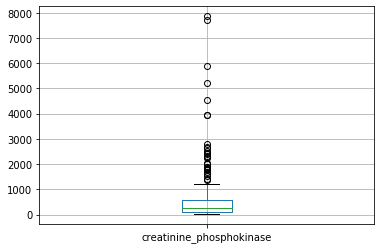

In [8]:
df.boxplot(column='creatinine_phosphokinase')

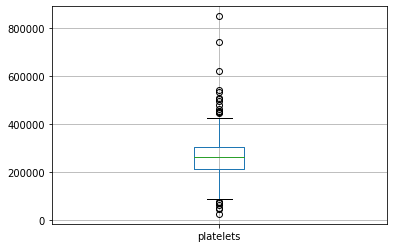

In [9]:
df.boxplot(column='platelets')

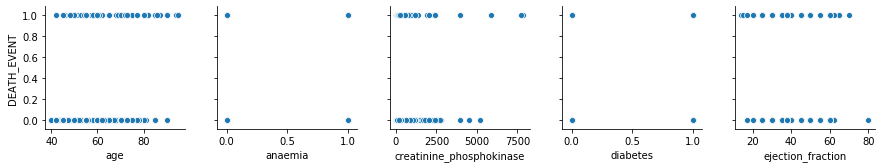

In [10]:
sns.pairplot(df, y_vars = ["DEATH_EVENT"],x_vars=["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction"])

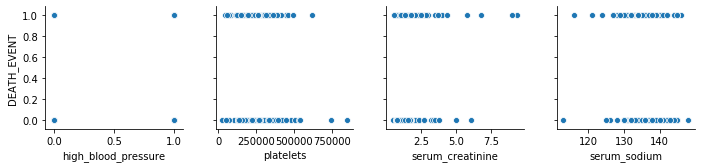

In [11]:
sns.pairplot(df, y_vars = ["DEATH_EVENT"],x_vars=["high_blood_pressure","platelets","serum_creatinine","serum_sodium"])

In [26]:
df.shape

(299, 13)

In [27]:
HP = df.copy()

In [29]:
from scipy import stats
HP=HP[(np.abs(stats.zscore(HP)) < 3).all(axis=1)]

In [30]:
HP.shape

(280, 13)

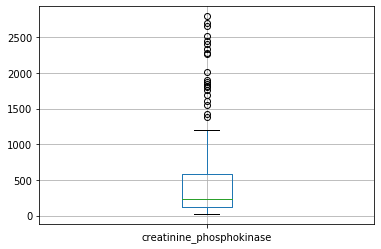

In [31]:
HP.boxplot(column='creatinine_phosphokinase')

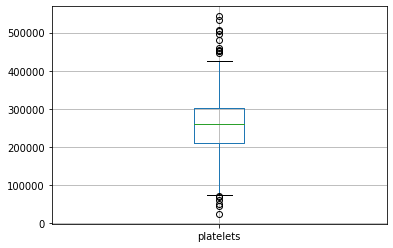

In [32]:
HP.boxplot(column='platelets')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [34]:
X = HP.drop('DEATH_EVENT',axis=1)
y = HP['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,31.5,age
1,1.9,anaemia
2,1.9,creatinine_phosphokinase
3,1.8,diabetes
4,13.2,ejection_fraction
5,1.7,high_blood_pressure
6,10.5,platelets
7,6.0,serum_creatinine
8,63.3,serum_sodium
9,3.8,sex


In [37]:
del HP["serum_sodium"]

In [38]:
X = HP.drop('DEATH_EVENT',axis=1)
y = HP['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,20.6,age
1,1.8,anaemia
2,1.8,creatinine_phosphokinase
3,1.7,diabetes
4,11.4,ejection_fraction
5,1.7,high_blood_pressure
6,9.0,platelets
7,5.7,serum_creatinine
8,3.7,sex
9,1.9,smoking


In [40]:
del HP["ejection_fraction"]

In [41]:
X = HP.drop('DEATH_EVENT',axis=1)
y = HP['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,15.6,age
1,1.8,anaemia
2,1.8,creatinine_phosphokinase
3,1.7,diabetes
4,1.6,high_blood_pressure
5,8.4,platelets
6,5.6,serum_creatinine
7,3.7,sex
8,1.9,smoking
9,3.7,time


In [42]:
del HP["age"]

In [43]:
X = HP.drop('DEATH_EVENT',axis=1)
y = HP['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.7,anaemia
1,1.8,creatinine_phosphokinase
2,1.7,diabetes
3,1.6,high_blood_pressure
4,6.5,platelets
5,4.2,serum_creatinine
6,3.5,sex
7,1.9,smoking
8,3.6,time


In [44]:
del HP["platelets"]

In [45]:
X = HP.drop('DEATH_EVENT',axis=1)
y = HP['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.6,anaemia
1,1.7,creatinine_phosphokinase
2,1.6,diabetes
3,1.4,high_blood_pressure
4,3.5,serum_creatinine
5,3.5,sex
6,1.8,smoking
7,3.0,time


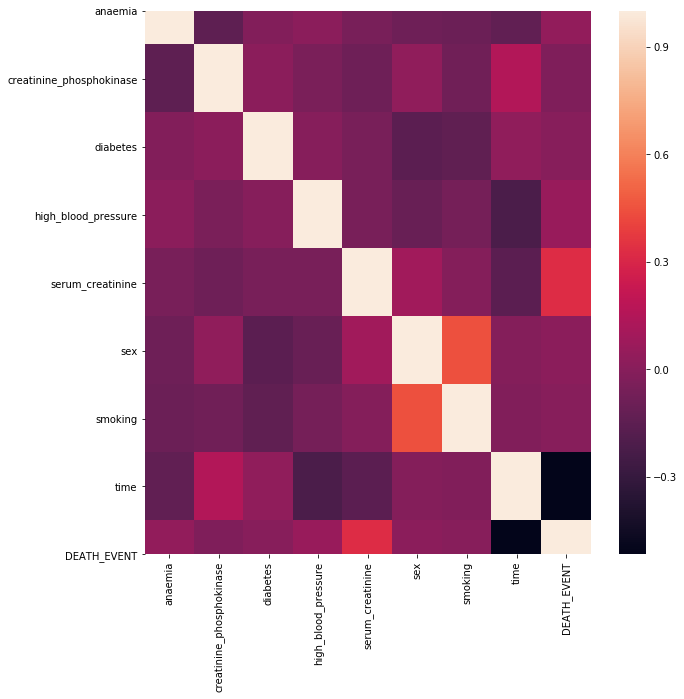

In [47]:
corr = HP.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [53]:
models = [LogisticRegression(),
          LinearDiscriminantAnalysis(),
          KNeighborsClassifier(n_neighbors=5), 
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          SVC(),
          RandomForestClassifier(random_state=42, n_estimators=100), 
          ]

In [64]:
X = HP.drop('DEATH_EVENT',axis=1)
y = HP['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
print(X.shape)
print(y.shape)

(280, 8)
(280,)


In [58]:
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score  

In [73]:
TestModels = pd.DataFrame()
tmp = {}

for model in models:
    print(model)
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    tmp['accuracy_score'] = accuracy_score(pred, y_test)
    tmp['classification_report'] = classification_report(pred, y_test)
    tmp['confusion_matrix'] = confusion_matrix(pred, y_test)
    
    print('accuracy_score', accuracy_score(pred, y_test))
    print('classification_report', classification_report(pred, y_test))
    print('confusion_matrix', confusion_matrix(pred, y_test))
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)

 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy_score 0.8214285714285714
classification_report               precision    recall  f1-score   support

           0       0.93      0.83      0.88        64
           1       0.59      0.80      0.68        20

    accuracy                           0.82        84
   macro avg       0.76      0.81      0.78        84
weighted avg       0.85      0.82      0.83        84

confusion_matrix [[53 11]
 [ 4 16]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
accuracy_score 0.7619047619047619
classific

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 0.8452380952380952
classification_report               precision    recall  f1-score   support

           0       0.95      0.84      0.89        64
           1       0.63      0.85      0.72        20

    accuracy                           0.85        84
   macro avg       0.79      0.85      0.81        84
weighted avg       0.87      0.85      0.85        84

confusion_matrix [[54 10]
 [ 3 17]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
accuracy_score 0.7261904761904762
classification_report               precision    recall  f1-score   support

           0       0

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy_score 0.8571428571428571
classification_report               precision    recall  f1-score   support

           0       0.96      0.85      0.90        65
           1       0.63      0.89      0.74        19

    accuracy                           0.86        84
   macro avg       0.80      0.87      0.82        84
weighted avg       0.89      0.86      0.86        84

confusion_matrix [[55 10]
 [ 2 17]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [74]:
TestModels

,accuracy_score,classification_report,confusion_matrix
Model,,,
LogisticRegression,0.821429,precision recall f1-score ...,"[[53, 11], [4, 16]]"
LinearDiscriminantAnalysis,0.761905,precision recall f1-score ...,"[[52, 15], [5, 12]]"
KNeighborsClassifier,0.773810,precision recall f1-score ...,"[[51, 13], [6, 14]]"
GaussianNB,0.845238,precision recall f1-score ...,"[[54, 10], [3, 17]]"
DecisionTreeClassifier,0.726190,precision recall f1-score ...,"[[48, 14], [9, 13]]"
SVC,0.666667,precision recall f1-score ...,"[[56, 27], [1, 0]]"
RandomForestClassifier,0.857143,precision recall f1-score ...,"[[55, 10], [2, 17]]"


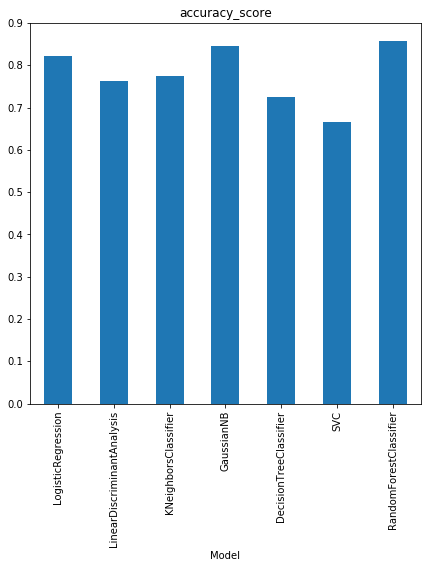

In [76]:
fig, axes = plt.subplots(ncols=1, figsize=(7, 7))
TestModels.accuracy_score.plot(ax=axes, kind='bar', title='accuracy_score')
plt.show()

In [77]:
X = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
print(X.shape)
print(y.shape)

(299, 12)
(299,)


In [79]:
TestModels = pd.DataFrame()
tmp = {}

for model in models:
    print(model)
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    tmp['accuracy_score'] = accuracy_score(pred, y_test)
    tmp['classification_report'] = classification_report(pred, y_test)
    tmp['confusion_matrix'] = confusion_matrix(pred, y_test)
    
    print('accuracy_score', accuracy_score(pred, y_test))
    print('classification_report', classification_report(pred, y_test))
    print('confusion_matrix', confusion_matrix(pred, y_test))
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy_score 0.7888888888888889
classification_report               precision    recall  f1-score   support

           0       0.92      0.77      0.84        64
           1       0.59      0.85      0.70        26

    accuracy                           0.79        90
   macro avg       0.76      0.81      0.77        90
weighted avg       0.83      0.79      0.80        90

confusion_matrix [[49 15]
 [ 4 22]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
accuracy_score 0.8111111111111111
classific

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 [[50 18]
 [ 3 19]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
accuracy_score 0.6777777777777778
classification_report               precision    recall  f1-score   support

           0       0.79      0.70      0.74        60
           1       0.51      0.63      0.57        30

    accuracy                           0.68        90
   macro avg       0.65      0.67      0.66        90
weighted avg       0.70      0.68      0.68        90

confusion_matrix [[42 18]
 [11 19]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
SVC(C=1.0, cache_size=200, class_wei

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


accuracy_score 0.7666666666666667
classification_report               precision    recall  f1-score   support

           0       0.91      0.75      0.82        64
           1       0.57      0.81      0.67        26

    accuracy                           0.77        90
   macro avg       0.74      0.78      0.74        90
weighted avg       0.81      0.77      0.78        90

confusion_matrix [[48 16]
 [ 5 21]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [80]:
TestModels

,accuracy_score,classification_report,confusion_matrix
Model,,,
LogisticRegression,0.788889,precision recall f1-score ...,"[[49, 15], [4, 22]]"
LinearDiscriminantAnalysis,0.811111,precision recall f1-score ...,"[[50, 14], [3, 23]]"
KNeighborsClassifier,0.555556,precision recall f1-score ...,"[[46, 33], [7, 4]]"
GaussianNB,0.766667,precision recall f1-score ...,"[[50, 18], [3, 19]]"
DecisionTreeClassifier,0.677778,precision recall f1-score ...,"[[42, 18], [11, 19]]"
SVC,0.588889,precision recall f1-score ...,"[[53, 37], [0, 0]]"
RandomForestClassifier,0.766667,precision recall f1-score ...,"[[48, 16], [5, 21]]"
